In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from termcolor import colored
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics 
from utils import *
import pickle

## Data Cleaning

In [2]:
df = pd.read_csv('./googleplaystore.csv')
print(len(df))
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df.head()

10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df = df.dropna()
df = df.drop_duplicates(keep=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8484 non-null   object 
 1   Category        8484 non-null   object 
 2   Rating          8484 non-null   float64
 3   Reviews         8484 non-null   object 
 4   Size            8484 non-null   object 
 5   Installs        8484 non-null   object 
 6   Type            8484 non-null   object 
 7   Price           8484 non-null   object 
 8   Content Rating  8484 non-null   object 
 9   Genres          8484 non-null   object 
 10  Last Updated    8484 non-null   object 
 11  Current Ver     8484 non-null   object 
 12  Android Ver     8484 non-null   object 
dtypes: float64(1), object(12)
memory usage: 927.9+ KB


In [4]:
for column in df.columns:
    print( column, '-------', type(df[column][0]), '-------', df[column][0])

App ------- <class 'str'> ------- Photo Editor & Candy Camera & Grid & ScrapBook
Category ------- <class 'str'> ------- ART_AND_DESIGN
Rating ------- <class 'numpy.float64'> ------- 4.1
Reviews ------- <class 'str'> ------- 159
Size ------- <class 'str'> ------- 19M
Installs ------- <class 'str'> ------- 10,000+
Type ------- <class 'str'> ------- Free
Price ------- <class 'str'> ------- 0
Content Rating ------- <class 'str'> ------- Everyone
Genres ------- <class 'str'> ------- Art & Design
Last Updated ------- <class 'str'> ------- January 7, 2018
Current Ver ------- <class 'str'> ------- 1.0.0
Android Ver ------- <class 'str'> ------- 4.0.3 and up


In [5]:
for col in df.columns:
    a = df[col]
    s = []
    for i in a:
        if type(i) not in s:
            s.append(type(i))
    print(col, '-----', len(s), '------>', s)

App ----- 1 ------> [<class 'str'>]
Category ----- 1 ------> [<class 'str'>]
Rating ----- 1 ------> [<class 'float'>]
Reviews ----- 1 ------> [<class 'str'>]
Size ----- 1 ------> [<class 'str'>]
Installs ----- 1 ------> [<class 'str'>]
Type ----- 1 ------> [<class 'str'>]
Price ----- 1 ------> [<class 'str'>]
Content Rating ----- 1 ------> [<class 'str'>]
Genres ----- 1 ------> [<class 'str'>]
Last Updated ----- 1 ------> [<class 'str'>]
Current Ver ----- 1 ------> [<class 'str'>]
Android Ver ----- 1 ------> [<class 'str'>]


In [6]:
df['Type'] = df['Type'].astype(str)
df['Content Rating'] = df['Content Rating'].astype(str)
df['Current Ver'] = df['Current Ver'].astype(str)
df['Android Ver'] = df['Android Ver'].astype(str)

In [7]:
for column in df.columns:
    print ("number of unique values in column {}:".format(column), len(np.unique(np.array(df[column]))))

number of unique values in column App: 7919
number of unique values in column Category: 33
number of unique values in column Rating: 39
number of unique values in column Reviews: 5655
number of unique values in column Size: 412
number of unique values in column Installs: 19
number of unique values in column Type: 2
number of unique values in column Price: 70
number of unique values in column Content Rating: 6
number of unique values in column Genres: 114
number of unique values in column Last Updated: 1295
number of unique values in column Current Ver: 2555
number of unique values in column Android Ver: 31


In [8]:
print('The length of this dataframe is:', len(df))
df = pd.DataFrame.drop_duplicates(df)
print('The length of this reduced dataframe is:', len(df))

The length of this dataframe is: 8484
The length of this reduced dataframe is: 8484


In [9]:
clean_df = pd.DataFrame()

clean_df['App'] = df['App']
clean_df['Category'] = df['Category']
clean_df['Installs'] = df['Installs']
clean_df['Price'] = df['Price']
clean_df['Content Rating'] = df['Content Rating']
clean_df['Genres'] = df['Genres']
clean_df['Current Ver'] = df['Current Ver']
clean_df['Android Ver'] = df['Android Ver']
clean_df['Rating'] = df['Rating']
clean_df['Type'] = df['Type'] # need to delete the NAN and Free the 0 parts

In [10]:
clean_df.head()

,App,Category,Installs,Price,Content Rating,Genres,Current Ver,Android Ver,Rating,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",0,Everyone,Art & Design,1.0.0,4.0.3 and up,4.1,Free
1,Coloring book moana,ART_AND_DESIGN,"500,000+",0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",0,Teen,Art & Design,Varies with device,4.2 and up,4.5,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,Free


In [11]:
category_dict = categorize(clean_df['Category'])
clean_df = clean_df.replace({"Category": category_dict})

Type_dict = categorize(clean_df['Type'])
clean_df = clean_df.replace({"Type": Type_dict})

Content_Rating_dict = categorize(clean_df['Content Rating'])
clean_df = clean_df.replace({"Content Rating": Content_Rating_dict})

Genres_dict = categorize(clean_df['Genres'])
clean_df = clean_df.replace({"Genres": Genres_dict})

price_col = digitize_price(clean_df['Price'])
clean_df['Price'] = price_col

category_CV = categorize(clean_df['Current Ver'])
clean_df = clean_df.replace({"Current Ver": category_CV})

category_AV = categorize(clean_df['Android Ver'])
clean_df = clean_df.replace({"Android Ver": category_AV})

Installs = categorize(clean_df['Installs'])
clean_df = clean_df.replace({"Installs": Installs})

In [12]:
for col in clean_df.columns:
    print('datatype of {}: '.format(col), clean_df[col].dtype)

datatype of App:  object
datatype of Category:  float64
datatype of Installs:  float64
datatype of Price:  float64
datatype of Content Rating:  float64
datatype of Genres:  float64
datatype of Current Ver:  float64
datatype of Android Ver:  float64
datatype of Rating:  float64
datatype of Type:  float64


In [13]:
clean_df = clean_df.dropna()
clean_df.head()

,App,Category,Installs,Price,Content Rating,Genres,Current Ver,Android Ver,Rating,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,6.0,0.0,2.0,10.0,107.0,15.0,4.1,1.0
1,Coloring book moana,1.0,18.0,0.0,2.0,12.0,938.0,15.0,3.9,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,13.0,0.0,2.0,10.0,420.0,15.0,4.7,1.0
3,Sketch - Draw & Paint,1.0,16.0,0.0,5.0,10.0,2500.0,18.0,4.5,1.0
4,Pixel Draw - Number Art Coloring Book,1.0,9.0,0.0,2.0,11.0,248.0,20.0,4.3,1.0


In [14]:
len(np.unique(clean_df['Rating']))

38

## Visualizations

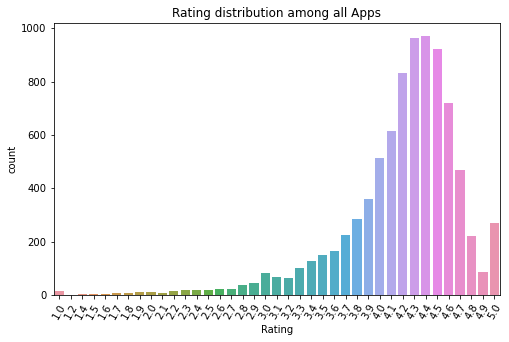

In [15]:
fig = plt.figure(figsize=(8,5))
sns.countplot('Rating', data=df)
plt.title("Rating distribution among all Apps")
plt.xticks(rotation=60) 
plt.show()

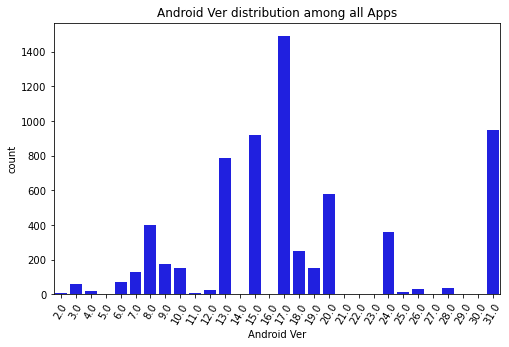

In [16]:
fig = plt.figure(figsize=(8,5))
sns.countplot('Android Ver', data=clean_df, color='Blue')
plt.title("Android Ver distribution among all Apps")
plt.xticks(rotation=60) 
plt.show()

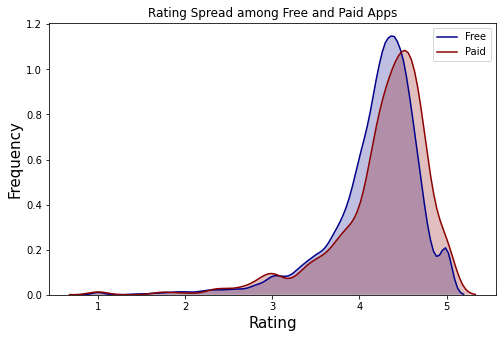

In [17]:
# rating distibution 
plt.figure(figsize=(8,5))
data1 = df[df['Price'] == '0']
data2 = df[df['Price'] != '0']
fig = sns.kdeplot(data1['Rating'], color="darkblue", shade = True, label='Free')
fig = sns.kdeplot(data2['Rating'], color="darkred", shade = True, label = 'Paid')
fig.set_xlabel("Rating",size=15)
fig.set_ylabel("Frequency",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Rating Spread among Free and Paid Apps')
plt.show()

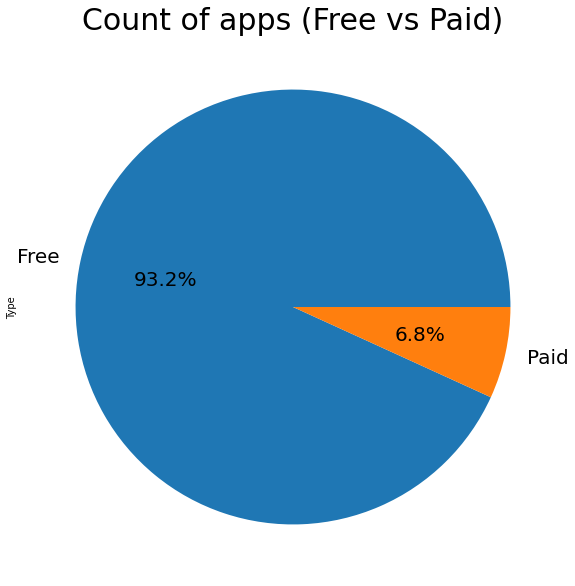

In [18]:
plt.figure(figsize=(10,10))
df['Type'].value_counts().plot(kind='pie', fontsize = 20, autopct='%1.1f%%')

plt.title('Count of apps (Free vs Paid)',size = 30)
plt.show()

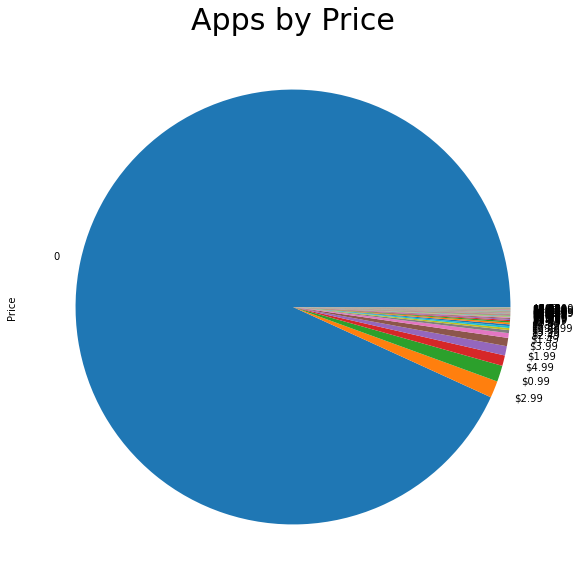

In [19]:
plt.figure(figsize=(10,10))
df['Price'].value_counts().plot(kind='pie', fontsize=10)

plt.title('Apps by Price',size = 30)
plt.show()

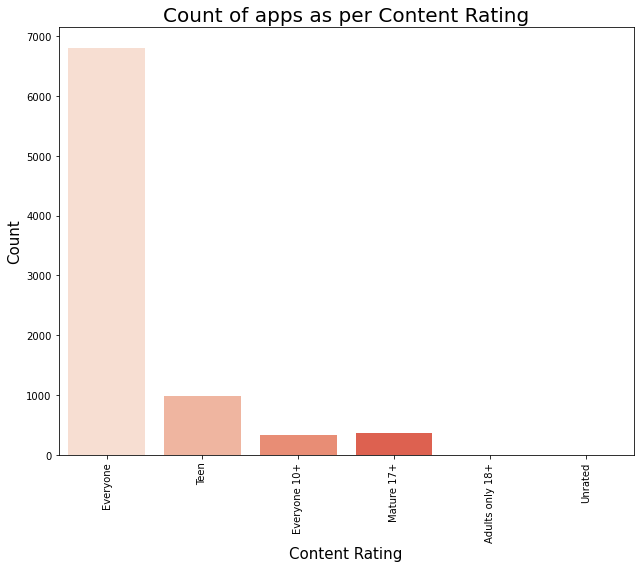

In [20]:
plt.figure(figsize=(9,8))
fig=sns.countplot(df['Content Rating'],palette='Reds')
#ax = sns.countplot(y="class", hue="who", data=titanic)
fig.set_xlabel("Content Rating",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Content Rating',size = 20)
plt.tight_layout()

In [21]:
X = df[['Content Rating', 'Rating']]
X.head()

,Content Rating,Rating
0,Everyone,4.1
1,Everyone,3.9
2,Everyone,4.7
3,Teen,4.5
4,Everyone,4.3


<Figure size 1080x864 with 0 Axes>

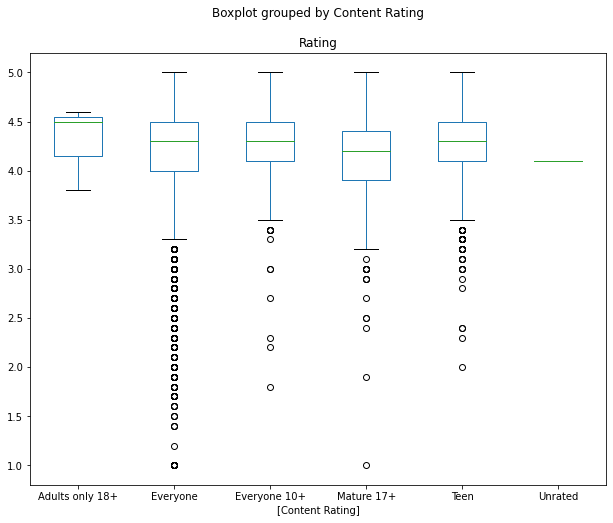

In [22]:
fig = plt.figure(figsize=(15,12))
X = df[['Content Rating', 'Rating']]
X.boxplot(by ='Content Rating', figsize=(10,8))
plt.grid(False)
plt.show()

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


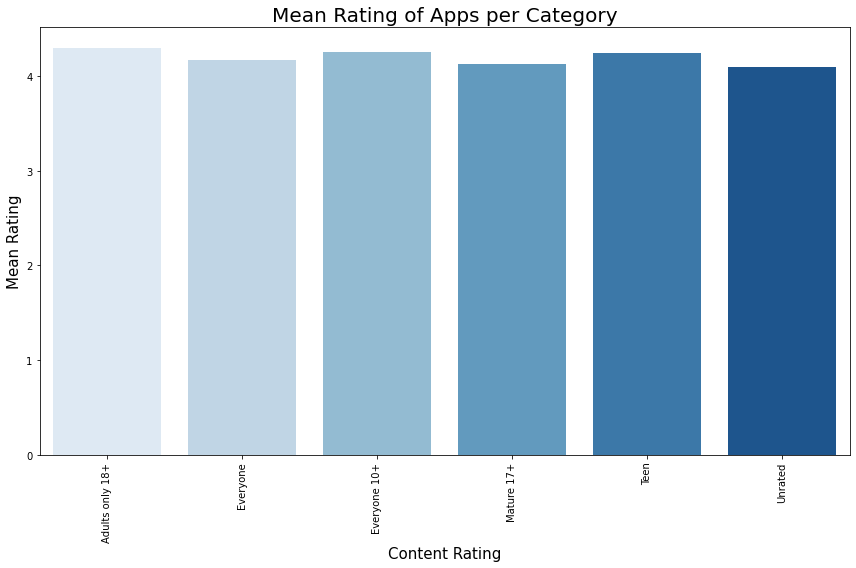

In [24]:
rat_catdf=df.groupby('Content Rating').describe().reset_index()
#rat_catdf.head()
plt.figure(figsize=(12,8))
fig=sns.barplot(rat_catdf['Content Rating'],rat_catdf['Rating']['mean'],palette='Blues')
fig.set_xlabel("Content Rating",size=15)
fig.set_ylabel("Mean Rating",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Category',size = 20)
plt.tight_layout()

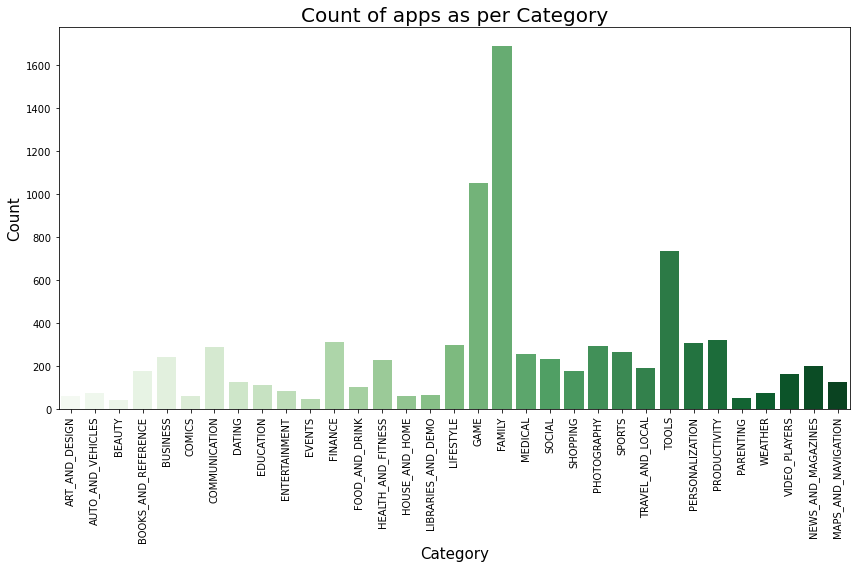

In [25]:
plt.figure(figsize=(12,8))
fig=sns.countplot(df['Category'],palette='Greens')
fig.set_xlabel("Category",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Category',size = 20)
plt.tight_layout()

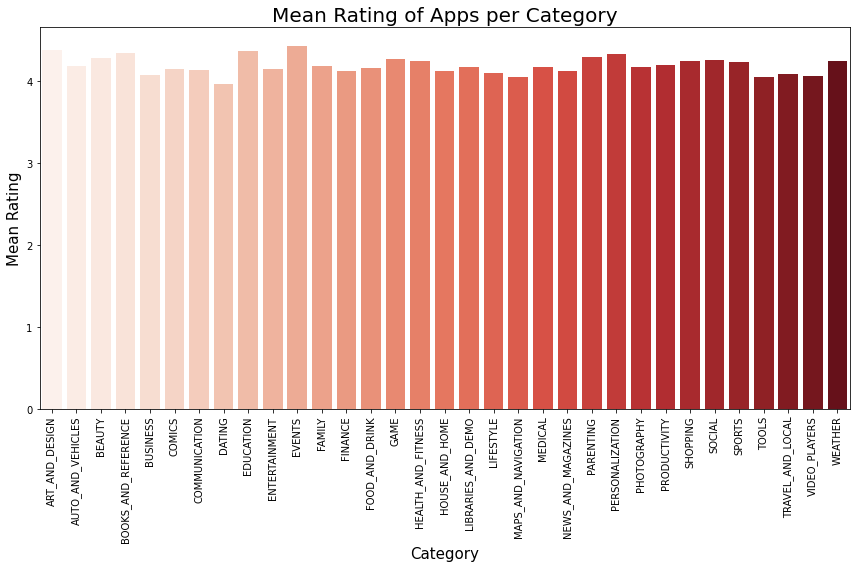

In [26]:
rat_catdf=df.groupby('Category').describe().reset_index()
#rat_catdf.head()
plt.figure(figsize=(12,8))
fig=sns.barplot(rat_catdf['Category'],rat_catdf['Rating']['mean'],palette='Reds')
fig.set_xlabel("Category",size=15)
fig.set_ylabel("Mean Rating",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Category',size = 20)
plt.tight_layout()

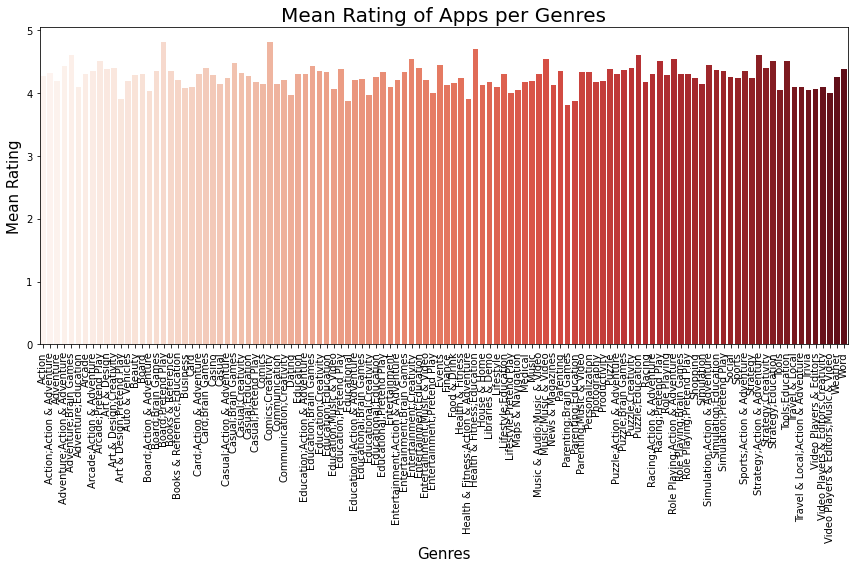

In [27]:
rat_catdf=df.groupby('Genres').describe().reset_index()
#rat_catdf.head()
plt.figure(figsize=(12,8))
fig=sns.barplot(rat_catdf['Genres'],rat_catdf['Rating']['mean'],palette='Reds')
fig.set_xlabel("Genres",size=15)
fig.set_ylabel("Mean Rating",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Genres',size = 20)
plt.tight_layout()

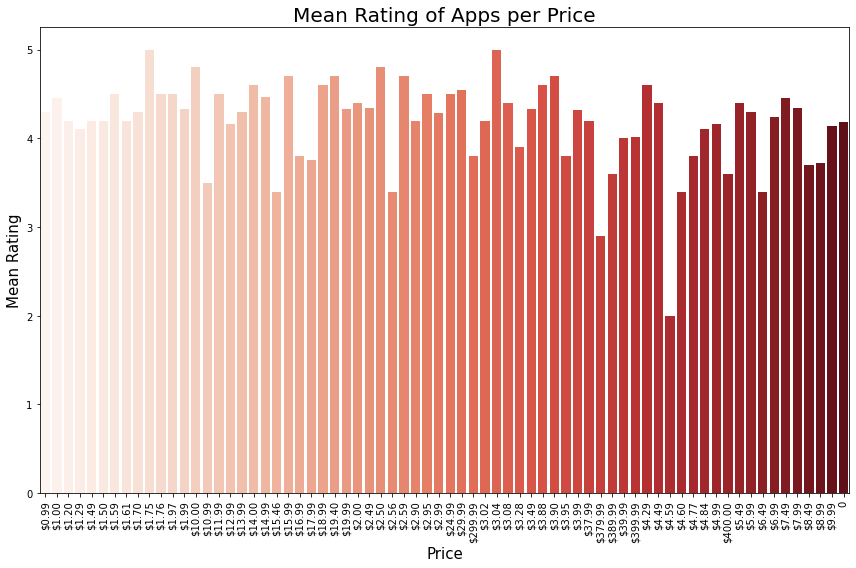

In [28]:
rat_catdf=df.groupby('Price').describe().reset_index()
#rat_catdf.head()
plt.figure(figsize=(12,8))
fig=sns.barplot(rat_catdf['Price'],rat_catdf['Rating']['mean'],palette='Reds')
fig.set_xlabel("Price",size=15)
fig.set_ylabel("Mean Rating",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Price',size = 20)
plt.tight_layout()

In [29]:
clean_df.head()

,App,Category,Installs,Price,Content Rating,Genres,Current Ver,Android Ver,Rating,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,6.0,0.0,2.0,10.0,107.0,15.0,4.1,1.0
1,Coloring book moana,1.0,18.0,0.0,2.0,12.0,938.0,15.0,3.9,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,13.0,0.0,2.0,10.0,420.0,15.0,4.7,1.0
3,Sketch - Draw & Paint,1.0,16.0,0.0,5.0,10.0,2500.0,18.0,4.5,1.0
4,Pixel Draw - Number Art Coloring Book,1.0,9.0,0.0,2.0,11.0,248.0,20.0,4.3,1.0


In [30]:
for col in clean_df.columns:
    print(col, '----------', len(np.unique(clean_df[col])))

App ---------- 6149
Category ---------- 33
Installs ---------- 19
Price ---------- 57
Content Rating ---------- 6
Genres ---------- 108
Current Ver ---------- 2165
Android Ver ---------- 30
Rating ---------- 38
Type ---------- 2


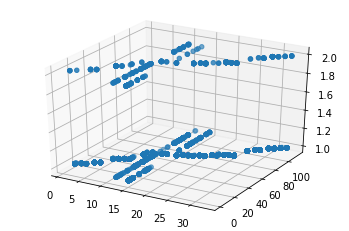

In [31]:
d3plot = plt.figure().gca(projection = '3d')
d3plot.scatter(clean_df['Category'],clean_df['Genres'],clean_df['Type'])
plt.show()

## Correlation Matrix

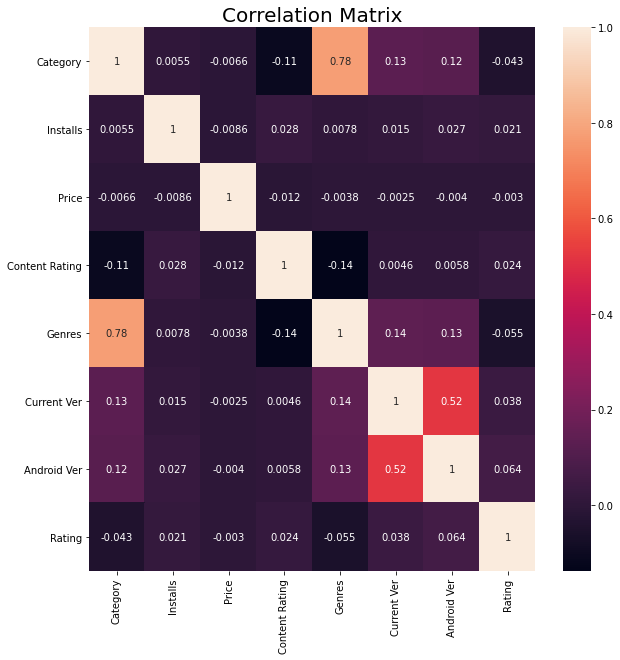

In [32]:
fig =  plt.figure(figsize=(10,10))
new_frame = clean_df[clean_df.columns[1:9]]
correlation_mat = new_frame.corr()
sns.heatmap(correlation_mat, annot=True)
plt.title('Correlation Matrix', size=20)
plt.show()

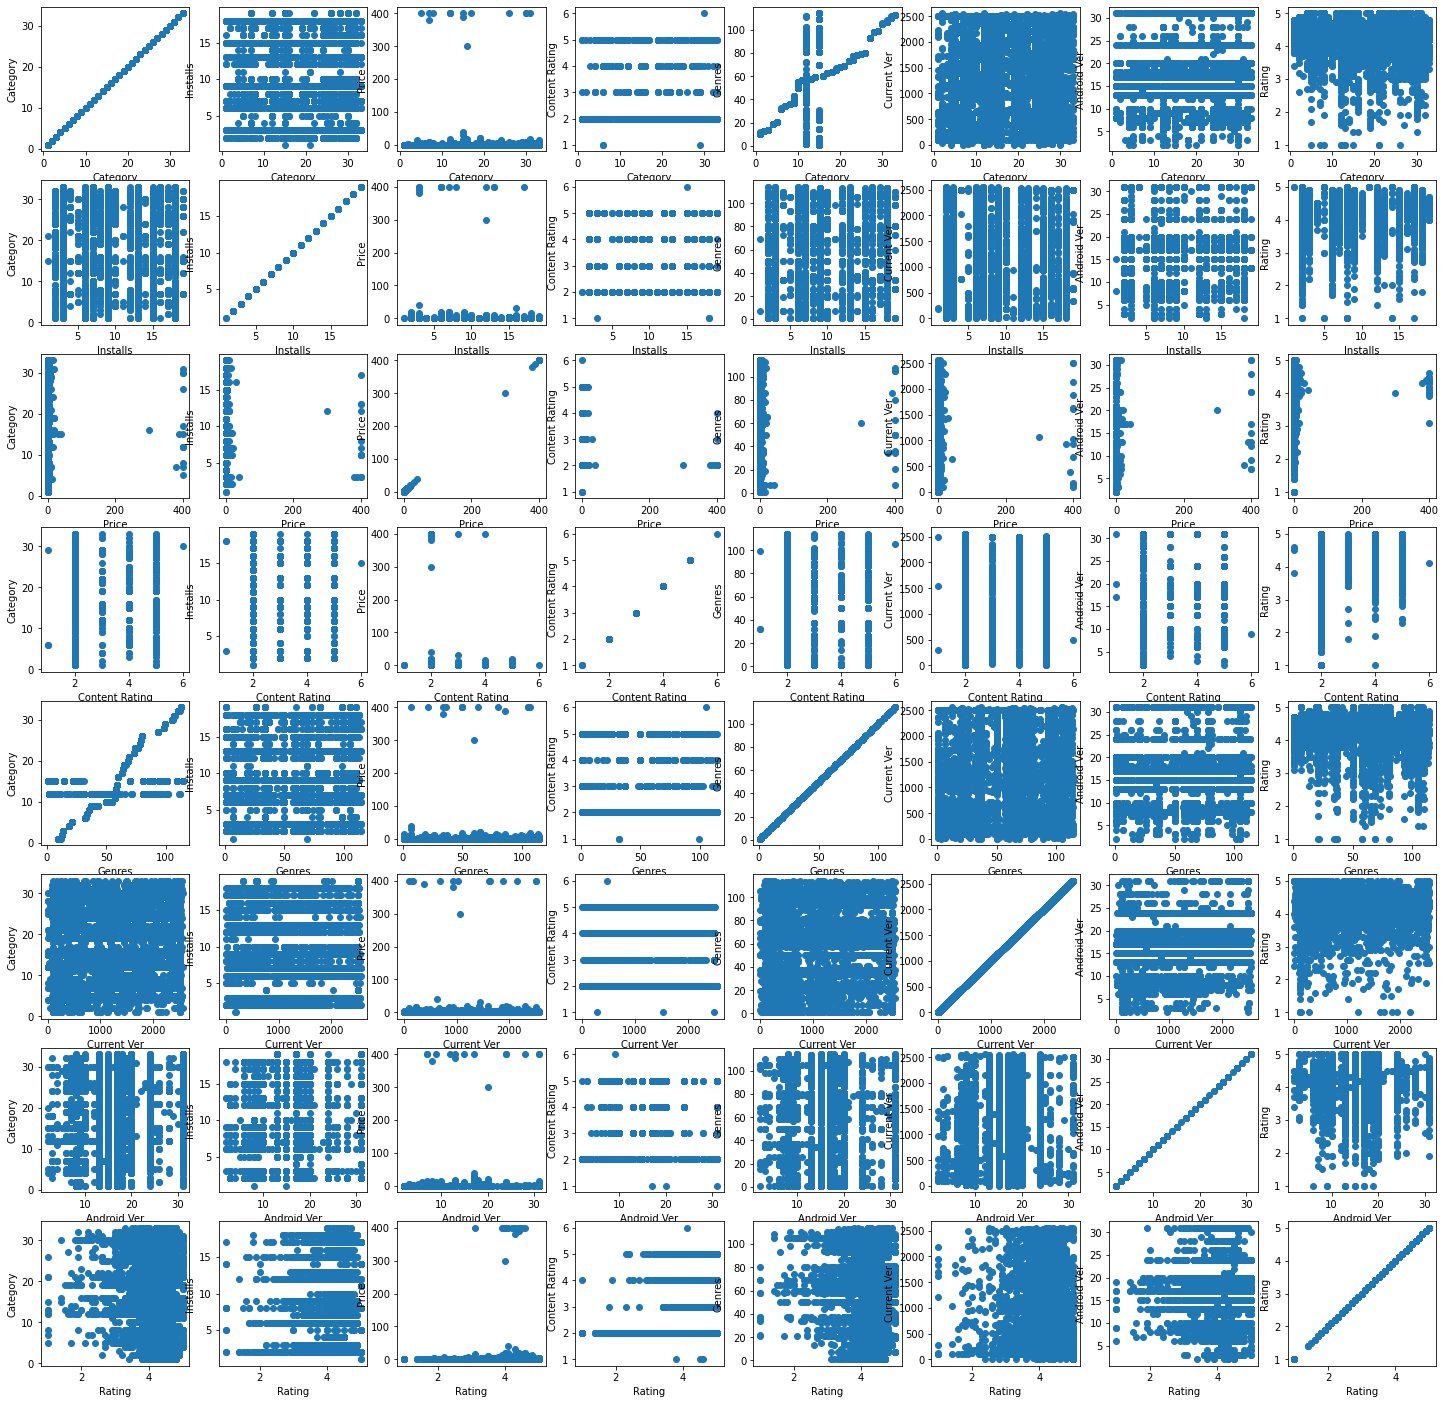

In [33]:
fig, axis = plt.subplots(8, 8, figsize = (25,25))

for ind1, i in enumerate(new_frame.columns):
    for ind2, j in enumerate(new_frame.columns):
        x = new_frame[i]
        y = new_frame[j]
        axis[ind1, ind2].scatter(x,y)
        axis[ind1, ind2].set_xlabel(i)
        axis[ind1, ind2].set_ylabel(j)
plt.show()


In [34]:
for column in clean_df.columns:
    print(colored('Does column {} have NaN ?'.format(column), 'blue'))
    print(colored(df[column].isnull().values.any(), 'green'))


Does column App have NaN ?
False
Does column Category have NaN ?
False
Does column Installs have NaN ?
False
Does column Price have NaN ?
False
Does column Content Rating have NaN ?
False
Does column Genres have NaN ?
False
Does column Current Ver have NaN ?
False
Does column Android Ver have NaN ?
False
Does column Rating have NaN ?
False
Does column Type have NaN ?
False


In [35]:
print(colored('Columns with finite values return True:', 'green'))
for i in clean_df.columns[1:]:
    print(i,'--------', np.all(np.isfinite(clean_df[i])))

Columns with finite values return True:
Category -------- True
Installs -------- True
Price -------- True
Content Rating -------- True
Genres -------- True
Current Ver -------- True
Android Ver -------- True
Rating -------- True
Type -------- True


## Split Train and Test set

In [36]:
clean_df.head()


,App,Category,Installs,Price,Content Rating,Genres,Current Ver,Android Ver,Rating,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,6.0,0.0,2.0,10.0,107.0,15.0,4.1,1.0
1,Coloring book moana,1.0,18.0,0.0,2.0,12.0,938.0,15.0,3.9,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,13.0,0.0,2.0,10.0,420.0,15.0,4.7,1.0
3,Sketch - Draw & Paint,1.0,16.0,0.0,5.0,10.0,2500.0,18.0,4.5,1.0
4,Pixel Draw - Number Art Coloring Book,1.0,9.0,0.0,2.0,11.0,248.0,20.0,4.3,1.0


In [37]:
# exclude the Genre and Current Version column
new = pd.concat((clean_df[clean_df.columns[0:5]],clean_df[clean_df.columns[7:9]]), axis=1)
new.head()

,App,Category,Installs,Price,Content Rating,Android Ver,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,6.0,0.0,2.0,15.0,4.1
1,Coloring book moana,1.0,18.0,0.0,2.0,15.0,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,13.0,0.0,2.0,15.0,4.7
3,Sketch - Draw & Paint,1.0,16.0,0.0,5.0,18.0,4.5
4,Pixel Draw - Number Art Coloring Book,1.0,9.0,0.0,2.0,20.0,4.3


In [38]:
clean_df = new[new.columns[1:]]
num_train = int(len(clean_df)*0.90)
trainset = clean_df[:num_train]
testset = clean_df[num_train:]

print('Training size is: ', len(trainset))
print('Test size is: ', len(testset))

Training size is:  5985
Test size is:  665


In [39]:
clean_df.head()

,Category,Installs,Price,Content Rating,Android Ver,Rating
0,1.0,6.0,0.0,2.0,15.0,4.1
1,1.0,18.0,0.0,2.0,15.0,3.9
2,1.0,13.0,0.0,2.0,15.0,4.7
3,1.0,16.0,0.0,5.0,18.0,4.5
4,1.0,9.0,0.0,2.0,20.0,4.3


## Clustering + KNN

In [61]:
results_k_1 = defaultdict(list)
for i in range (20,38):
    
    kmeans = KMeans(n_clusters=i).fit(trainset)
    centroids = kmeans.cluster_centers_
 

    labels = pd.DataFrame(kmeans.labels_)
    labeledFrame = pd.concat((trainset,labels),axis=1)
    labeledFrame = labeledFrame.rename({0:'labels'},axis=1)
    
    
    eval_set =  evaluate(labeledFrame, kmeans, testset, k=1)
    targets , preds = eval_set.pred()
    acc = abs(eval_set.accuracy(targets, preds))
    print("The accuracy for {} clusters and 1 nearest neightber is:".format(i), abs(acc))
    results_k_1['centroids'].append(centroids)
    results_k_1['cluster'].append(i)      
    results_k_1['acc'].append(acc)
    results_k_1['targ'].append(targets)
    results_k_1['pred'].append(preds)


The accuracy for 20 clusters and 1 nearest neightber is: 66.4384
The accuracy for 21 clusters and 1 nearest neightber is: 59.7573
The accuracy for 22 clusters and 1 nearest neightber is: 60.4568
The accuracy for 23 clusters and 1 nearest neightber is: 60.726099999999995
The accuracy for 24 clusters and 1 nearest neightber is: 61.2205
The accuracy for 25 clusters and 1 nearest neightber is: 60.4367
The accuracy for 26 clusters and 1 nearest neightber is: 61.8878
The accuracy for 27 clusters and 1 nearest neightber is: 64.0224
The accuracy for 28 clusters and 1 nearest neightber is: 68.1566
The accuracy for 29 clusters and 1 nearest neightber is: 68.59479999999999
The accuracy for 30 clusters and 1 nearest neightber is: 73.8609
The accuracy for 31 clusters and 1 nearest neightber is: 65.345
The accuracy for 32 clusters and 1 nearest neightber is: 71.4248
The accuracy for 33 clusters and 1 nearest neightber is: 75.7444
The accuracy for 34 clusters and 1 nearest neightber is: 62.925
The ac

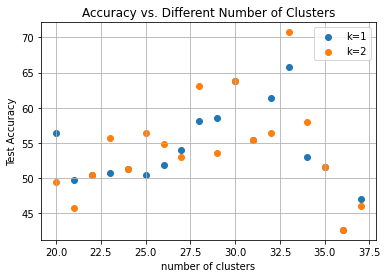

In [104]:
plt.scatter(np.arange(20,38),results_k_1['acc'],label='k=1')
plt.scatter(np.arange(20,38),l,label='k=2')
plt.title('Accuracy vs. Different Number of Clusters')
plt.xlabel('number of clusters')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid()
plt.show()